# <center> Supervised learning: Classification with Titanic dataset </center>

## 1. Data types

![](https://miro.medium.com/max/1200/0*tZj7CTvSzNcjnISR)

## 2. Classification vs Regression
||Regression|Clasification|
|-|-|-|
|Data|Attribute-value description|Attribute-value description|
|Target|Continuous|Nominal|
|Evaluation methods|Cross-validation, train test split ...|Cross-validation, train test split ...|
|Errors|MSE, MAE, RMSE|1-accuracy|
|Algorithms|Linear regression|Decision Tree, Naive Bayes ...|
|Baseline|Mean of target|Majority class|

## 3. Titanic dataset

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|fare| Passenger fare||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|
|deck|||

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
titanic.isnull().sum()*100/len(titanic)


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

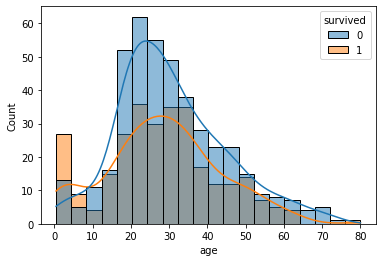

In [16]:
sns.histplot(titanic, x= "age", hue = 'survived',kde = True)


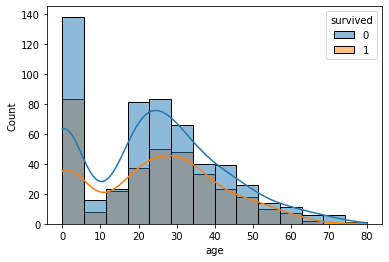

In [17]:
sns.histplot(titanic[['age','survived']].fillna(0), x='age', hue='survived', kde=True)
plt.show()


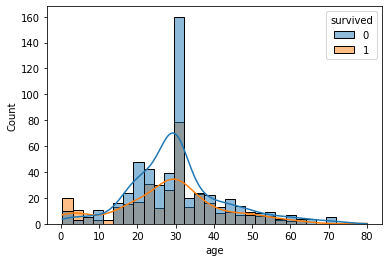

In [20]:
sns.histplot(titanic[['age','survived']].fillna(titanic['age'].mean()), x='age', hue='survived', kde=True)
plt.show()


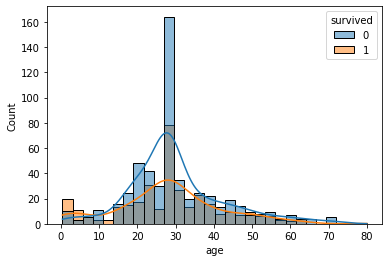

In [21]:
sns.histplot(titanic[['age','survived']].fillna(titanic['age'].median()), x='age', hue='survived', kde=True)

plt.show()


<AxesSubplot:xlabel='age', ylabel='fare'>

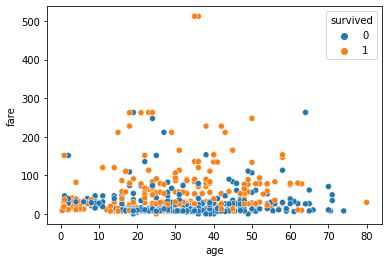

In [25]:
sns.scatterplot(data=titanic,x= 'age',y='fare',hue='survived')




<AxesSubplot:xlabel='age', ylabel='sibsp'>

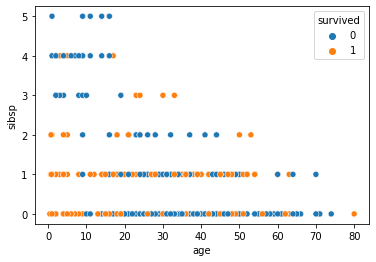

In [26]:
sns.scatterplot(data=titanic,x= 'age',y='sibsp',hue='survived')

<AxesSubplot:xlabel='age', ylabel='parch'>

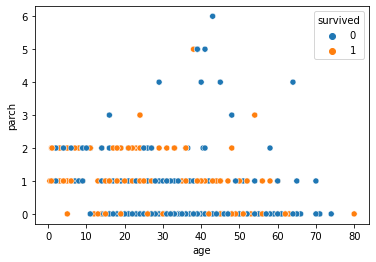

In [27]:
sns.scatterplot(data=titanic,x= 'age',y='parch',hue='survived')

<AxesSubplot:xlabel='parch', ylabel='age'>

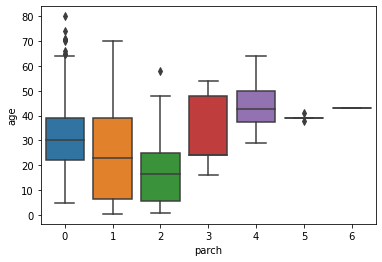

In [28]:
sns.boxplot(data=titanic,x='parch',y='age')

<AxesSubplot:xlabel='sibsp', ylabel='age'>

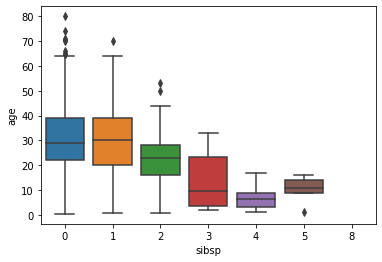

In [29]:
sns.boxplot(data=titanic,x='sibsp',y='age')

In [31]:
titanic.sex.unique()


array(['male', 'female'], dtype=object)

In [32]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [34]:
titanic.groupby(['who','sibsp','parch']).age.mean()

who    sibsp  parch
child  0      0        12.166667
              1         6.052500
              2         4.981111
       1      0        13.900000
              1         4.566667
              2         5.274286
       2      1         2.300000
              2         9.000000
       3      1         4.333333
              2         6.250000
       4      1         5.625000
              2         6.125000
       5      2         8.750000
man    0      0        32.973597
              1        38.583333
              2        35.800000
       1      0        32.701923
              1        36.000000
              2        30.750000
              3        16.000000
              4        52.000000
              5        39.000000
       2      0        31.181818
              1        23.000000
       3      1              NaN
              2        19.000000
       4      1        16.000000
       8      2              NaN
woman  0      0        31.084211
              1        